### Metagenom's Genus Classification using K-Nearest Neighbor and K-Mers Extraction.

For K-Mers Extraction Program, You can also find it in this repository : [Link](https://github.com/ryannolly/Machine-Learning-Or-Data-Science)

Written By : Ryan Ananda Nolly

This program is for fulfilling the assignment in Bioinformatics Course during my bachelor study in computer science. This is a simple KNN model to classify a Genus based on the reads or fragments of the metagenom's sequence. This will use K-Mers Extraction as a feature. You can directly use the .csv file produced by my K-Mers Extraction program.

Don't forget to put all of your .csv file in /data folder. and after that you may run all of the code below

Your path should look like this if you use google colab:

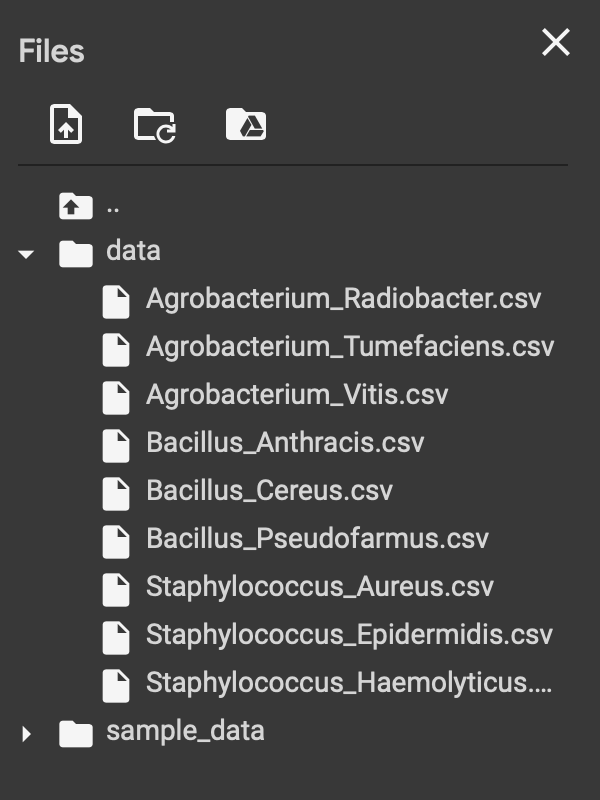

In [1]:
# Calling out the library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Calling the Dataset
import os
csv_files = os.listdir('data')
data = pd.DataFrame()
for i in csv_files : 
  data_1 = pd.read_csv(os.path.join('data', i))
  data = data.append(data_1, ignore_index=True)
  
data

,Data_Name,AAA,AAT,AAG,AAC,ATA,ATT,ATG,ATC,AGA,AGT,AGG,AGC,ACA,ACT,ACG,ACC,TAA,TAT,TAG,TAC,TTA,TTT,TTG,TTC,TGA,TGT,TGG,TGC,TCA,TCT,TCG,TCC,GAA,GAT,GAG,GAC,GTA,GTT,GTG,GTC,GGA,GGT,GGG,GGC,GCA,GCT,GCG,GCC,CAA,CAT,CAG,CAC,CTA,CTT,CTG,CTC,CGA,CGT,CGG,CGC,CCA,CCT,CCG,CCC,Species,Genus
0,Bacillus_Anthracis_0,25,14,11,10,9,11,13,4,14,12,7,4,6,12,11,1,9,9,10,9,13,21,8,10,14,7,6,11,5,8,8,6,18,12,9,9,9,10,7,5,16,5,3,4,5,11,7,0,8,2,7,2,6,10,10,8,4,7,12,4,3,3,1,0,Bacillus_Anthracis,Bacillus
1,Bacillus_Anthracis_1,19,13,6,14,16,16,6,12,3,7,1,6,6,12,7,3,20,11,6,5,7,31,13,17,9,7,2,11,7,11,9,11,5,11,3,3,7,10,4,2,3,4,0,3,11,6,7,7,8,14,2,6,12,11,7,7,7,5,7,11,6,8,7,4,Bacillus_Anthracis,Bacillus
2,Bacillus_Anthracis_2,39,18,13,13,11,10,13,6,18,12,8,5,17,12,8,2,18,5,7,15,9,19,13,8,11,16,5,3,9,7,6,2,17,9,16,6,16,11,6,5,8,5,1,3,2,4,7,1,9,8,7,5,8,9,3,5,12,5,3,3,1,2,2,1,Bacillus_Anthracis,Bacillus
3,Bacillus_Anthracis_3,30,13,18,5,13,13,11,6,19,11,10,9,5,5,7,3,10,10,13,9,10,13,11,9,10,11,4,8,4,3,9,3,15,12,13,5,16,10,7,2,9,5,6,6,11,6,8,5,11,8,6,1,3,7,4,2,6,8,6,7,6,2,3,0,Bacillus_Anthracis,Bacillus
4,Bacillus_Anthracis_4,37,20,15,11,12,17,14,8,10,8,5,9,8,6,8,8,13,13,6,13,15,12,7,7,12,4,11,6,3,7,3,9,21,12,2,4,14,3,4,4,10,8,3,1,10,3,6,3,12,6,9,2,4,9,8,3,7,5,3,6,8,8,4,6,Bacillus_Anthracis,Bacillus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,Bacillus_Cereus_9995,17,10,15,12,6,20,21,5,13,9,8,4,8,8,8,6,10,13,7,7,17,12,10,8,15,8,9,9,9,3,2,6,14,19,8,5,11,9,7,3,11,5,2,1,8,1,3,2,13,10,4,6,3,6,2,4,7,8,0,0,8,3,3,1,Bacillus_Cereus,Bacillus
89996,Bacillus_Cereus_9996,39,31,6,14,18,26,8,11,9,0,3,4,3,16,4,8,34,16,6,11,22,40,16,14,9,14,4,5,7,14,3,12,7,12,3,2,7,10,3,8,3,4,3,2,4,7,3,0,10,4,1,4,20,16,6,3,3,9,2,3,5,8,7,5,Bacillus_Cereus,Bacillus
89997,Bacillus_Cereus_9997,46,28,11,14,15,21,11,13,17,8,7,3,10,10,5,6,24,13,11,10,17,11,9,9,8,8,10,5,8,10,5,3,12,13,7,6,11,8,8,2,8,7,9,4,6,4,1,1,17,6,6,1,15,6,3,2,5,6,3,0,6,2,2,1,Bacillus_Cereus,Bacillus
89998,Bacillus_Cereus_9998,50,23,16,15,28,22,10,7,16,9,6,3,10,9,4,4,28,15,9,9,16,17,14,8,11,8,3,7,8,9,2,2,14,17,7,1,12,6,1,3,5,3,4,2,6,3,3,1,12,12,2,2,5,10,4,4,7,2,0,1,4,2,1,0,Bacillus_Cereus,Bacillus


In [3]:
# Looking at the number of distinct lable
total = 0
for i in data[' Species'].unique() : 
  print(i)
  total = total + 1

print("The number of distinct Species : " + str(total))

total = 0
for i in data[' Genus'].unique() : 
  print(i)
  total = total + 1

print("The number of distinct Label : " + str(total))

 Bacillus_Anthracis
 Agrobacterium_Vitis
 Staphylococcus_Haemolyticus
 Staphylococcus_Epidermis
 Agrobacterium_Tumefaciens
 Bacillus_Pseudofarmus
 Agrobacterium_Radiobacter
 Staphylococcus_Aureus
 Bacillus_Cereus
The number of distinct Species : 9
 Bacillus
 Agrobacterium
 Staphylococcus
The number of distinct Label : 3


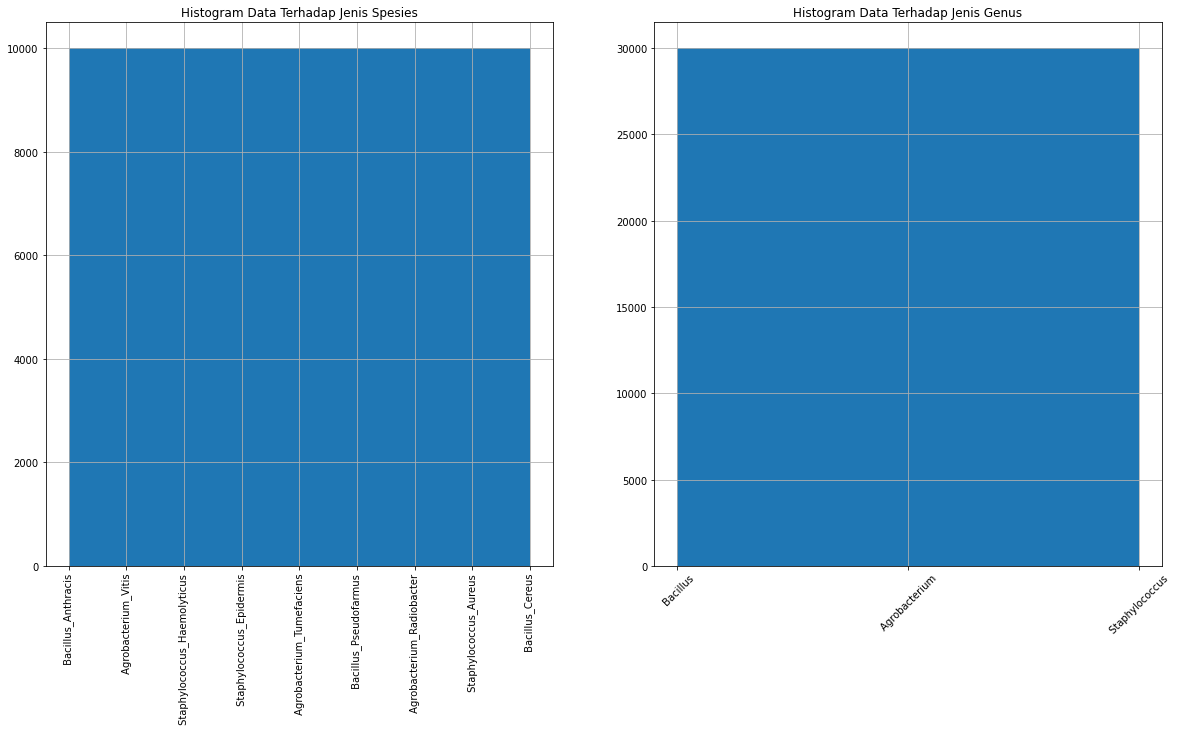

In [4]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Histogram Data Terhadap Jenis Spesies")
plt.xticks(rotation=90)
data[' Species'].hist(bins = 9)
plt.subplot(1, 2, 2)
plt.title("Histogram Data Terhadap Jenis Genus")
plt.xticks(rotation = 45)
data[' Genus'].hist(bins = 3)

In [5]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Genus = data[' Genus'].unique()
data[' Genus'] = label_encoder.fit_transform(data[' Genus'])
Genus_Encoded = data[' Genus'].unique()
for i in range(len(Genus)) : 
  print("{} -> {}".format(Genus[i], Genus_Encoded[i]))

 Bacillus -> 1
 Agrobacterium -> 0
 Staphylococcus -> 2


In [6]:
#Splitting The X and Y Values
X = data.iloc[:, 1:-2].values
Y = data.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25)

In [8]:
#Lets look at the sample
print(X_Train)
print(X_Train.shape)

[[ 1  7  5 ...  8 10  1]
 [ 6  3 16 ... 17 24 36]
 [ 5  3 11 ...  9 22  6]
 ...
 [40 15 21 ...  3  0  0]
 [ 7  2  8 ...  9 21  5]
 [20 18  7 ...  7  3  6]]
(67500, 64)


In [9]:
print(Y_Train)

[0 1 0 ... 2 0 1]


In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 21, metric='minkowski', p = 2)
classifier.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [11]:
y_pred = classifier.predict(X_Test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), Y_Test.reshape(len(Y_Test), 1)), 1))

[[1 1]
 [1 1]
 [2 2]
 ...
 [0 0]
 [2 2]
 [2 1]]


In [12]:
#Counting The Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(Y_Test, y_pred)
print(cm)
print('The Accuracy of the Model is : ', accuracy_score(Y_Test, y_pred))

[[7516   23   11]
 [ 269 6171 1035]
 [   9  280 7186]]
The Accuracy of the Model is :  0.9276888888888889
